### pima indians 당뇨병 데이터 분석

### 1. 데이터 전처리

In [1]:
import pandas as pd
df = pd.read_csv('./pima-indians-diabetes.csv', skiprows=9, header=None)
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)
df.columns = ['P', 'G', 'BP', 'S', 'I', 'BMI', 'D', 'Age', 'Class']
df.head()

,P,G,BP,S,I,BMI,D,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isna().sum()

P        0
G        0
BP       0
S        0
I        0
BMI      0
D        0
Age      0
Class    0
dtype: int64

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X.shape, y.shape

((768, 8), (768,))

### 2. Train/Test 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### 3. 모델 학습 및 예측

- 결정트리

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)

- SVC

In [6]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_sv = svc.predict(X_test)

### 5. 평가 - 혼돈행렬, 정확도, 정밀도, 재현율, F1 Score

- 혼돈행렬

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_dt), confusion_matrix(y_test, pred_sv)

(array([[73, 27],
        [21, 33]]),
 array([[86, 14],
        [26, 28]]))

- 정확도

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt), accuracy_score(y_test, pred_sv)

(0.6883116883116883, 0.7402597402597403)

- 정밀도

In [9]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_dt), precision_score(y_test, pred_sv)

(0.55, 0.6666666666666666)

- 재현율

In [10]:
from sklearn.metrics import recall_score
recall_score(y_test, pred_dt), recall_score(y_test, pred_sv)

(0.6111111111111112, 0.5185185185185185)

- F1 Score

In [11]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_dt), f1_score(y_test, pred_sv)

(0.5789473684210527, 0.5833333333333334)

### 6. Graphviz

In [53]:
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree.dot', feature_names=df.columns[:-1], class_names=['0', '1'], impurity=True, filled=True)

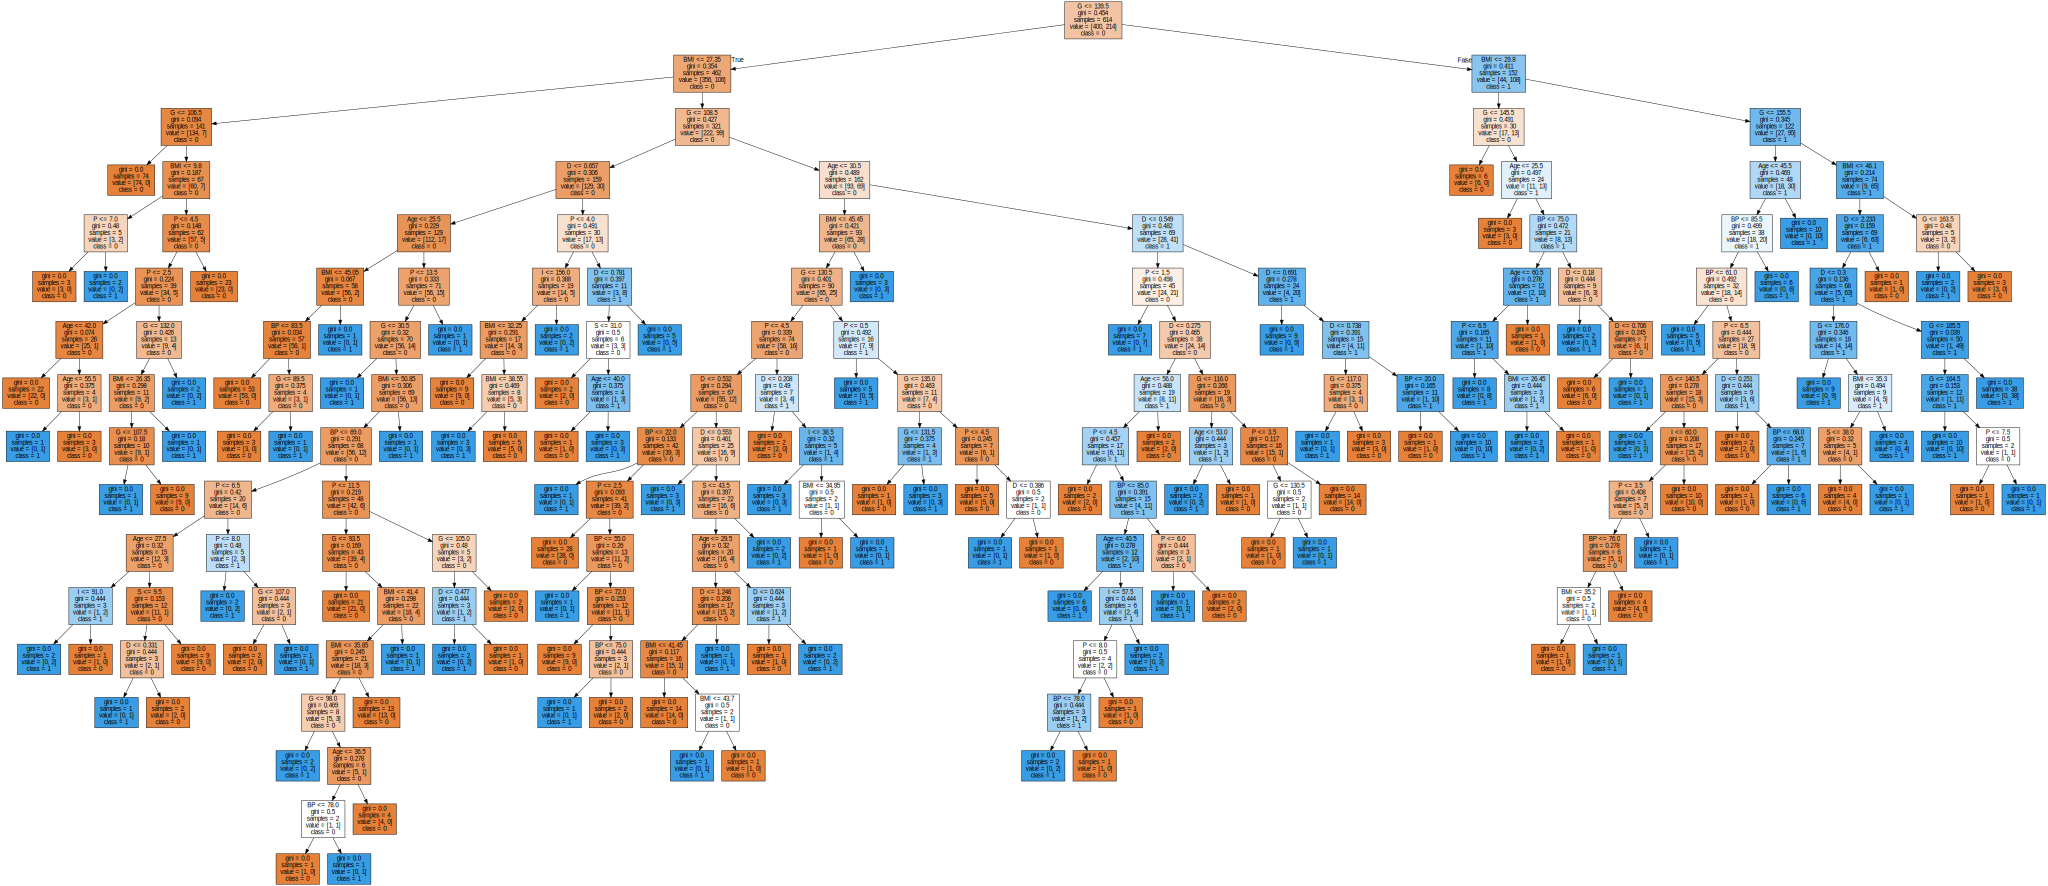

In [54]:
import graphviz

with open('tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- max_depth = 4

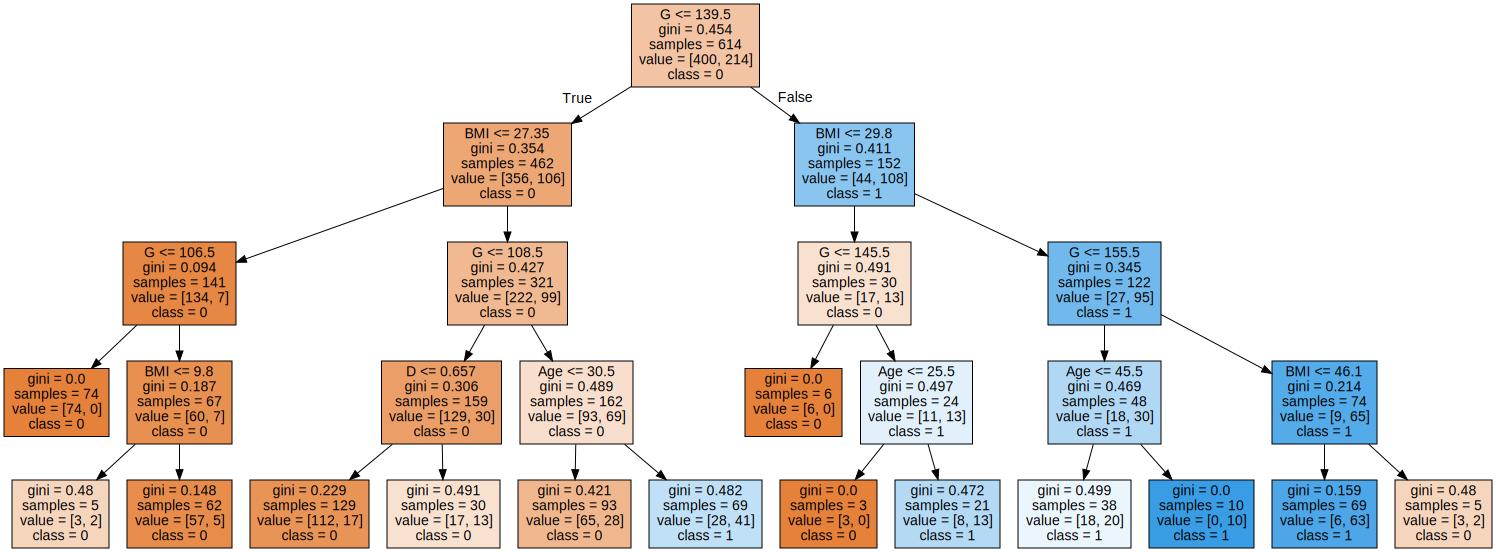

In [56]:
dtc2 = DecisionTreeClassifier(max_depth=4)
dtc2.fit(X_train, y_train)
export_graphviz(dtc2, out_file='tree.dot2', feature_names=df.columns[:-1], class_names=['0', '1'], impurity=True, filled=True)
with open('tree.dot2') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_split = 5

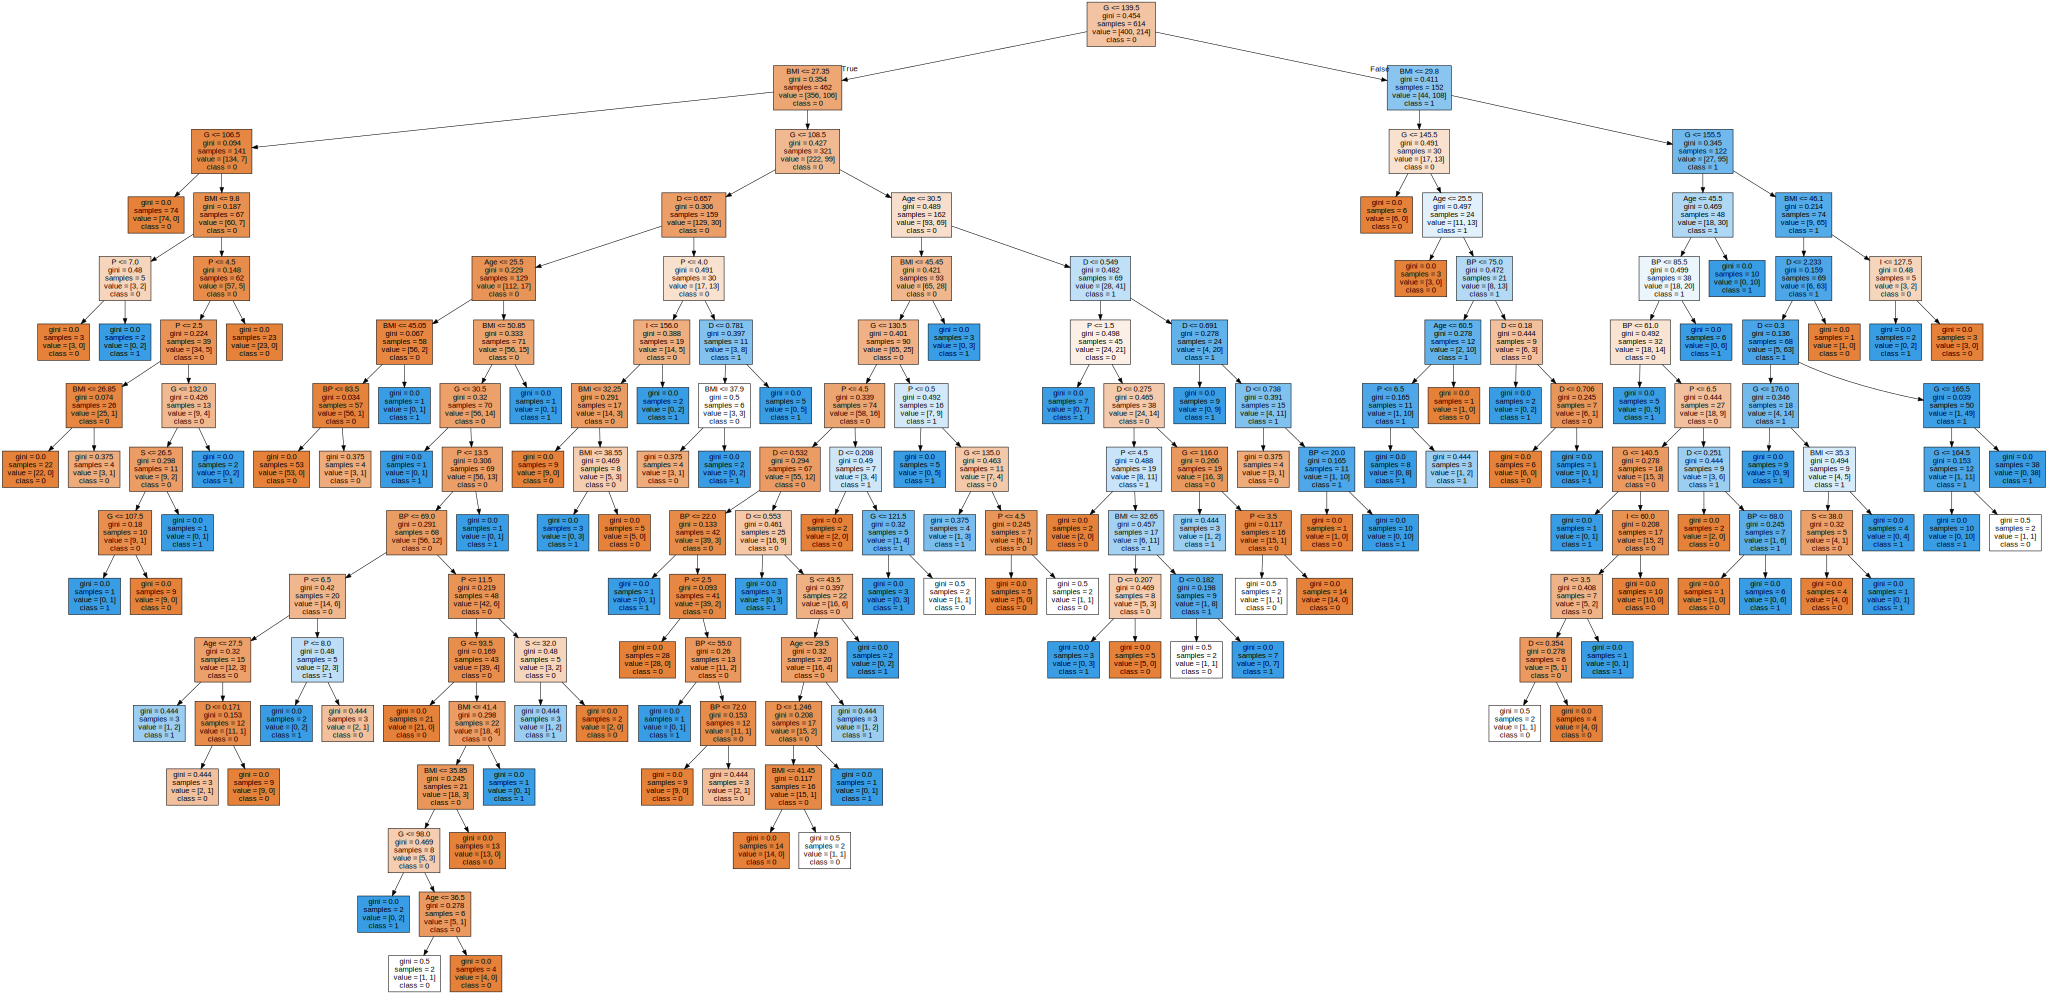

In [57]:
dtc3 = DecisionTreeClassifier(min_samples_split=5)
dtc3.fit(X_train, y_train)
export_graphviz(dtc3, out_file='tree.dot3', feature_names=df.columns[:-1], class_names=['0', '1'], impurity=True, filled=True)
with open('tree.dot3') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_leaf = 2

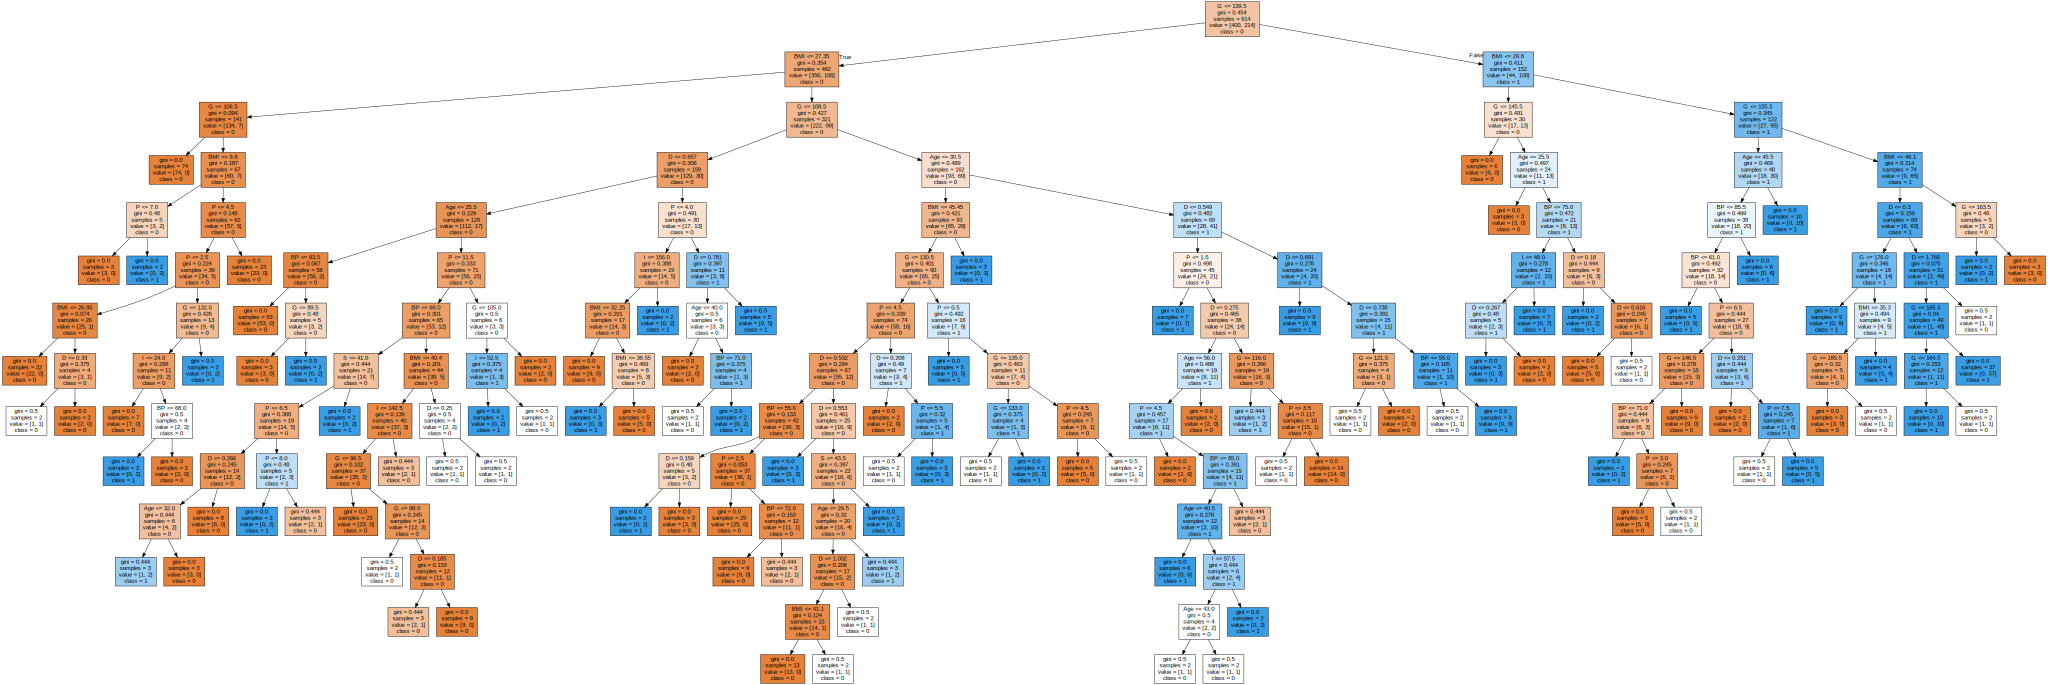

In [58]:
dtc4 = DecisionTreeClassifier(min_samples_leaf=2)
dtc4.fit(X_train, y_train)
export_graphviz(dtc4, out_file='tree.dot4', feature_names=df.columns[:-1], class_names=['0', '1'], impurity=True, filled=True)
with open('tree.dot4') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [59]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test), dtc4.score(X_test, y_test)

(0.6883116883116883,
 0.7662337662337663,
 0.6883116883116883,
 0.6883116883116883)

### 7. GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

- 결정트리

In [40]:
params = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4, 5]}
grid_dt = GridSearchCV(dtc, param_grid = params, scoring = 'accuracy', cv = 5)
grid_dt.fit(X_train, y_train)
grid_dt.best_params_

{'max_depth': 4, 'min_samples_split': 5}

In [43]:
params = {'max_depth': [3, 4, 5], 'min_samples_split': [4, 5, 6]}
grid_dt = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)
grid_dt.best_params_

{'max_depth': 4, 'min_samples_split': 5}

In [44]:
dtc_best = grid_dt.best_estimator_
dtc_best.score(X_test, y_test)

0.7662337662337663

- SVC

In [48]:
params = {'C': [0.01, 0.1, 1, 10, 100]}
grid_sv = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_sv.fit(X_train, y_train)
grid_sv.best_params_

{'C': 10}

In [49]:
params = {'C': [6, 8, 10, 12, 14]}
grid_sv = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_sv.fit(X_train, y_train)
grid_sv.best_params_

{'C': 6}

In [51]:
params = {'C': [5, 6, 7]}
grid_sv = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_sv.fit(X_train, y_train)
grid_sv.best_params_

{'C': 6}

In [52]:
svc_best = grid_sv.best_estimator_
svc_best.score(X_test, y_test)

0.7272727272727273